In [68]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('eurgbp-m1-bid-2020-02-01-2026-02-01.csv')
df

,timestamp,open,high,low,close,volume
0,1580680800000,0.84185,0.84196,0.84184,0.84188,8.250000
1,1580680860000,0.84187,0.84187,0.84167,0.84170,19.120001
2,1580680920000,0.84170,0.84171,0.84170,0.84171,3.000000
3,1580680980000,0.84172,0.84173,0.84168,0.84168,3.750000
4,1580681040000,0.84167,0.84174,0.84166,0.84168,1.700000
...,...,...,...,...,...,...
2229162,1769810100000,0.86604,0.86608,0.86597,0.86601,84.000000
2229163,1769810160000,0.86601,0.86612,0.86594,0.86610,105.599998
2229164,1769810220000,0.86607,0.86608,0.86582,0.86589,97.720001
2229165,1769810280000,0.86588,0.86589,0.86569,0.86576,143.830002


In [70]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df

,timestamp,open,high,low,close,volume
0,2020-02-02 22:00:00,0.84185,0.84196,0.84184,0.84188,8.250000
1,2020-02-02 22:01:00,0.84187,0.84187,0.84167,0.84170,19.120001
2,2020-02-02 22:02:00,0.84170,0.84171,0.84170,0.84171,3.000000
3,2020-02-02 22:03:00,0.84172,0.84173,0.84168,0.84168,3.750000
4,2020-02-02 22:04:00,0.84167,0.84174,0.84166,0.84168,1.700000
...,...,...,...,...,...,...
2229162,2026-01-30 21:55:00,0.86604,0.86608,0.86597,0.86601,84.000000
2229163,2026-01-30 21:56:00,0.86601,0.86612,0.86594,0.86610,105.599998
2229164,2026-01-30 21:57:00,0.86607,0.86608,0.86582,0.86589,97.720001
2229165,2026-01-30 21:58:00,0.86588,0.86589,0.86569,0.86576,143.830002


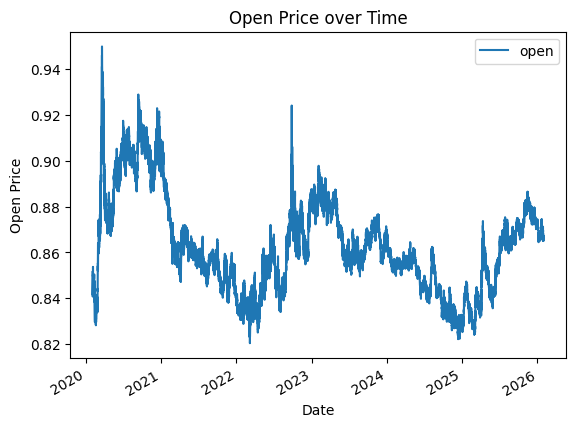

In [71]:
df.plot(x='timestamp', y='open')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price over Time')
plt.show()

In [ ]:
# Define the 14-period RSI feature: RSI = 100 - (100 / (1 + (average gain / average loss)))
period = 14
df['rsi'] = 100 - (100 / (1 + (df['close'].diff().clip(lower=0).rolling(window=period).mean() / df['close'].diff().clip(upper=0).abs().rolling(window=period).mean())))
df

,timestamp,open,high,low,close,volume,rsi
14,2020-02-02 22:14:00,0.84165,0.84166,0.84165,0.84166,2.000000,27.083333
15,2020-02-02 22:15:00,0.84161,0.84161,0.84160,0.84160,2.500000,36.111111
16,2020-02-02 22:16:00,0.84162,0.84165,0.84153,0.84154,17.670000,29.268293
17,2020-02-02 22:17:00,0.84153,0.84154,0.84151,0.84153,8.690000,30.769231
18,2020-02-02 22:18:00,0.84153,0.84153,0.84153,0.84153,7.810000,30.769231
...,...,...,...,...,...,...,...
2229162,2026-01-30 21:55:00,0.86604,0.86608,0.86597,0.86601,84.000000,46.590909
2229163,2026-01-30 21:56:00,0.86601,0.86612,0.86594,0.86610,105.599998,49.462366
2229164,2026-01-30 21:57:00,0.86607,0.86608,0.86582,0.86589,97.720001,46.938776
2229165,2026-01-30 21:58:00,0.86588,0.86589,0.86569,0.86576,143.830002,34.343434


In [ ]:
# Define the Exponential Moving Average (EMA) feature: EMA = (Close * K) + (Prev EMA * (1 - K)), where K = 2 / (N + 1) and N is the number of periods
def calculate_ema(series, period):
    ema = series.ewm(span=period, adjust=False).mean()
    return ema

df['ema_20'] = calculate_ema(df['close'], 20)
df['ema_50'] = calculate_ema(df['close'], 50)
df['ema_200'] = calculate_ema(df['close'], 200)
df


,timestamp,open,high,low,close,volume,rsi,ema_20,ema_50,ema_200
14,2020-02-02 22:14:00,0.84165,0.84166,0.84165,0.84166,2.000000,27.083333,0.841660,0.841660,0.841660
15,2020-02-02 22:15:00,0.84161,0.84161,0.84160,0.84160,2.500000,36.111111,0.841654,0.841658,0.841659
16,2020-02-02 22:16:00,0.84162,0.84165,0.84153,0.84154,17.670000,29.268293,0.841643,0.841653,0.841658
17,2020-02-02 22:17:00,0.84153,0.84154,0.84151,0.84153,8.690000,30.769231,0.841633,0.841648,0.841657
18,2020-02-02 22:18:00,0.84153,0.84153,0.84153,0.84153,7.810000,30.769231,0.841623,0.841644,0.841656
...,...,...,...,...,...,...,...,...,...,...
2229162,2026-01-30 21:55:00,0.86604,0.86608,0.86597,0.86601,84.000000,46.590909,0.866056,0.866112,0.866226
2229163,2026-01-30 21:56:00,0.86601,0.86612,0.86594,0.86610,105.599998,49.462366,0.866060,0.866111,0.866225
2229164,2026-01-30 21:57:00,0.86607,0.86608,0.86582,0.86589,97.720001,46.938776,0.866044,0.866103,0.866222
2229165,2026-01-30 21:58:00,0.86588,0.86589,0.86569,0.86576,143.830002,34.343434,0.866017,0.866089,0.866217


In [ ]:
# Define volatility based indicators
def calc_volatility(series, period):
    return series.rolling(window=period).std()

df['volatility_20'] = calc_volatility(df['close'], 20)
df['volatility_50'] = calc_volatility(df['close'], 50)
df['volatility_200'] = calc_volatility(df['close'], 200)

def calc_bollinger_bands(series, period):
    sma = series.rolling(window=period).mean()
    std = series.rolling(window=period).std()
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)
    return upper_band, lower_band

df['bollinger_upper_20'], df['bollinger_lower_20'] = calc_bollinger_bands(df['close'], 20)
df['bollinger_upper_50'], df['bollinger_lower_50'] = calc_bollinger_bands(df['close'], 50)
df['bollinger_upper_200'], df['bollinger_lower_200'] = calc_bollinger_bands(df['close'], 200)
df

,timestamp,open,high,low,close,volume,rsi,ema_20,ema_50,ema_200,volatility_20,volatility_50,volatility_200,bollinger_upper_20,bollinger_lower_20,bollinger_upper_50,bollinger_lower_50,bollinger_upper_200,bollinger_lower_200
14,2020-02-02 22:14:00,0.84165,0.84166,0.84165,0.84166,2.000000,27.083333,0.841660,0.841660,0.841660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2020-02-02 22:15:00,0.84161,0.84161,0.84160,0.84160,2.500000,36.111111,0.841654,0.841658,0.841659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2020-02-02 22:16:00,0.84162,0.84165,0.84153,0.84154,17.670000,29.268293,0.841643,0.841653,0.841658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2020-02-02 22:17:00,0.84153,0.84154,0.84151,0.84153,8.690000,30.769231,0.841633,0.841648,0.841657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2020-02-02 22:18:00,0.84153,0.84153,0.84153,0.84153,7.810000,30.769231,0.841623,0.841644,0.841656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229162,2026-01-30 21:55:00,0.86604,0.86608,0.86597,0.86601,84.000000,46.590909,0.866056,0.866112,0.866226,0.000065,0.000092,0.000152,0.866185,0.865923,0.866308,0.865940,0.866591,0.865984
2229163,2026-01-30 21:56:00,0.86601,0.86612,0.86594,0.86610,105.599998,49.462366,0.866060,0.866111,0.866225,0.000062,0.000091,0.000152,0.866174,0.865928,0.866303,0.865941,0.866589,0.865983
2229164,2026-01-30 21:57:00,0.86607,0.86608,0.86582,0.86589,97.720001,46.938776,0.866044,0.866103,0.866222,0.000067,0.000093,0.000153,0.866172,0.865904,0.866301,0.865927,0.866588,0.865977
2229165,2026-01-30 21:58:00,0.86588,0.86589,0.86569,0.86576,143.830002,34.343434,0.866017,0.866089,0.866217,0.000085,0.000103,0.000156,0.866187,0.865848,0.866309,0.865898,0.866590,0.865966


In [ ]:
# Define Volume-based indicators
# Define the Volume Weighted Average Price (VWAP) feature: VWAP = (Sum of (Price * Volume)) / (Sum of Volume)
def calculate_vwap(df):
    pass
# Define the On-Balance Volume (OBV) feature: OBV = Previous OBV + Volume (if Close > Previous Close), OBV = Previous OBV - Volume (if Close < Previous Close), OBV = Previous OBV (if Close == Previous Close)
def calculate_obv(df):
    pass

In [ ]:
df.dropna(inplace=True)
#df.to_csv('processed_eurgbp_m1.csv', index=False)
df